<a href="https://colab.research.google.com/github/march2397/Diabetes-Prediction-of-Pima-Indian-Women-Using-Logistic-Regressionn-/blob/main/Diabetes_Prediction_of_Pima_Indian_Women_Using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Prediction of Pima Indian Women Using Logistic Regression



*   Author      : Mariana Cristiane Kambey 
*   Data Source : Pima Indians Diabetes Database (kaggle)
*   The data was collected and made available by “National Institute of Diabetes and Digestive and Kidney Diseases” as part of the Pima Indians Diabetes Database. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here belong to the Pima Indian heritage (subgroup of Native Americans), and are women of ages 21 and above.





# Import Library 

In [ ]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection as model_selection
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import class_weight

In [ ]:
# mounted google drive
import google.colab as gc
gc.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# change folder
%cd '/content/drive/My Drive/'

/content/drive/My Drive


# Read the Data 

In [ ]:
# read the data
diabetes_data = pd.read_csv('diabetes2.csv')
diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Data Checking

In [ ]:
# check shape of diabetes_data
print("The shape of diabetes dataset :", diabetes_data.shape)

The shape of diabetes dataset : (768, 9)


In [ ]:
# check columns name of diabetes dataset
print("The columns name diabetes dataset :", diabetes_data.columns)

The columns name diabetes dataset : Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


*   Pregnancies : It shows that the number of times a female gets pregnant
*   Glucose     : It shows the plasma glucose concentration level    
*   BloodPressure : It shows the diastolic blood pressure in mm Hg
*   SkinThickness : It shows the triceps skin thickness in mm.
*   Insulin     : 2-Hour serum insulin
*   BMI : It shows body mass index.
*   DiabetesPedigreeFunction :This function scores the likelihood of diabetes
*   Age     : It shows the age in years
*   Outcome : It is either 0 or 1. Here, 0 means that a female has non-diabetic and 1 means that a female is diabetes.





In [ ]:
#check general information of the diabetes_data 
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# check simple statistic of the numeric value
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Text(0.5, 1.0, 'Total Outcome')

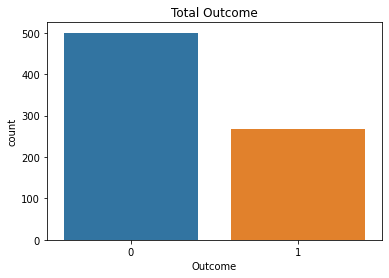

In [ ]:
#create visualization to see the total of each outcome
sns.countplot(x='Outcome', data=diabetes_data).set_title("Total Outcome")

In [ ]:
#check the total number of each outcome 
print('Total number of 0 are',(diabetes_data['Outcome']==0).sum())
print('Total number of 1 are',(diabetes_data['Outcome']==1).sum())

Total number of 0 are 500
Total number of 1 are 268


# Handle Missing Data

In [ ]:
#Total missing value of each column
print("Total missing value of Pregnancies :",diabetes_data['Pregnancies'].isna().sum())
print("Total missing value of Glucose :",diabetes_data['Glucose'].isna().sum())
print("Total missing value of BloodPressure :", diabetes_data['BloodPressure'].isna().sum())
print("Total missing value of SkinThickness :",diabetes_data['SkinThickness'].isna().sum())
print("Total missing value of Insulin :", diabetes_data['Insulin'].isna().sum())
print("Total missing value of BMI :", diabetes_data['BMI'].isna().sum())
print("Total missing value of DiabetesPedigreeFunction :", diabetes_data['DiabetesPedigreeFunction'].isna().sum())

Total missing value of Pregnancies : 0
Total missing value of Glucose : 0
Total missing value of BloodPressure : 0
Total missing value of SkinThickness : 0
Total missing value of Insulin : 0
Total missing value of BMI : 0
Total missing value of DiabetesPedigreeFunction : 0


In [ ]:
#Total zero values of each column
print("Total zero values in Pregnancies :", diabetes_data[diabetes_data['Pregnancies']==0].shape[0])
print("Total zero values in Glucose :", diabetes_data[diabetes_data['Glucose']==0].shape[0])
print("Total zero values in BloodPressure :", diabetes_data[diabetes_data['BloodPressure']==0].shape[0])
print("Total zero values in SkinThickness :", diabetes_data[diabetes_data['SkinThickness']==0].shape[0])
print("Total zero values in Insulin :", diabetes_data[diabetes_data['Insulin']==0].shape[0])
print("Total zero values in BMI :", diabetes_data[diabetes_data['BMI']==0].shape[0])
print("Total zero values in DiabetesPedigreeFunction :", diabetes_data[diabetes_data['DiabetesPedigreeFunction']==0].shape[0])
print("Total zero values in Age :", diabetes_data[diabetes_data['Age']==0].shape[0])

Total zero values in Pregnancies : 111
Total zero values in Glucose : 5
Total zero values in BloodPressure : 35
Total zero values in SkinThickness : 227
Total zero values in Insulin : 374
Total zero values in BMI : 11
Total zero values in DiabetesPedigreeFunction : 0
Total zero values in Age : 0


In [ ]:
#replace zero values with NaN 
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

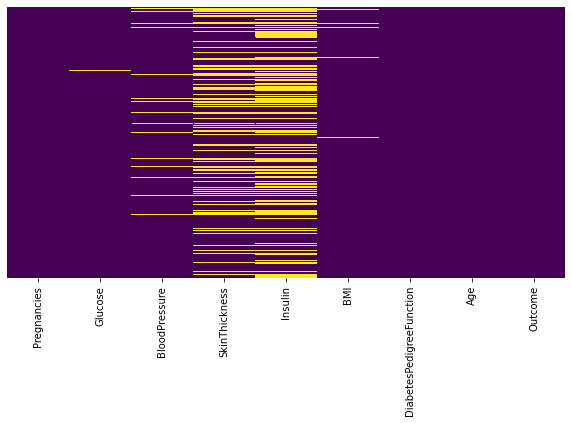

In [ ]:
#create visualization heatmap to see the missing data 
plt.figure(figsize=(10,5))
sns.heatmap(diabetes_data.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# drop insulin column because it has 374 missing values
diabetes_data.drop('Insulin', axis=1, inplace=True)

In [ ]:
#impute na with median value  in Glucose, BloodPressure, SkinThickness and BMI columns
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].median(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].median(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

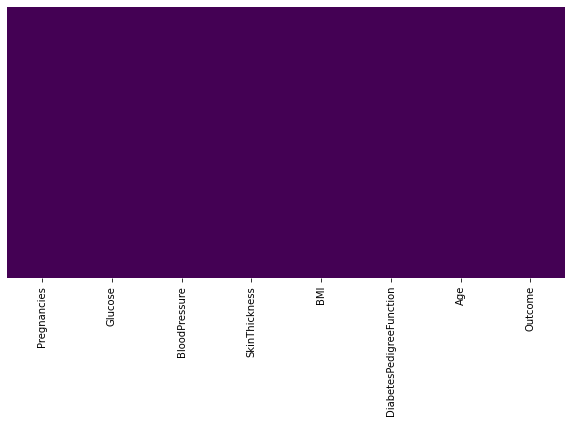

In [ ]:
#data visualization after missing values have been imputed 
plt.figure(figsize=(10,5))
sns.heatmap(diabetes_data.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# check simple statistic of the numeric value after missing values have been imputed
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Handle Outlier

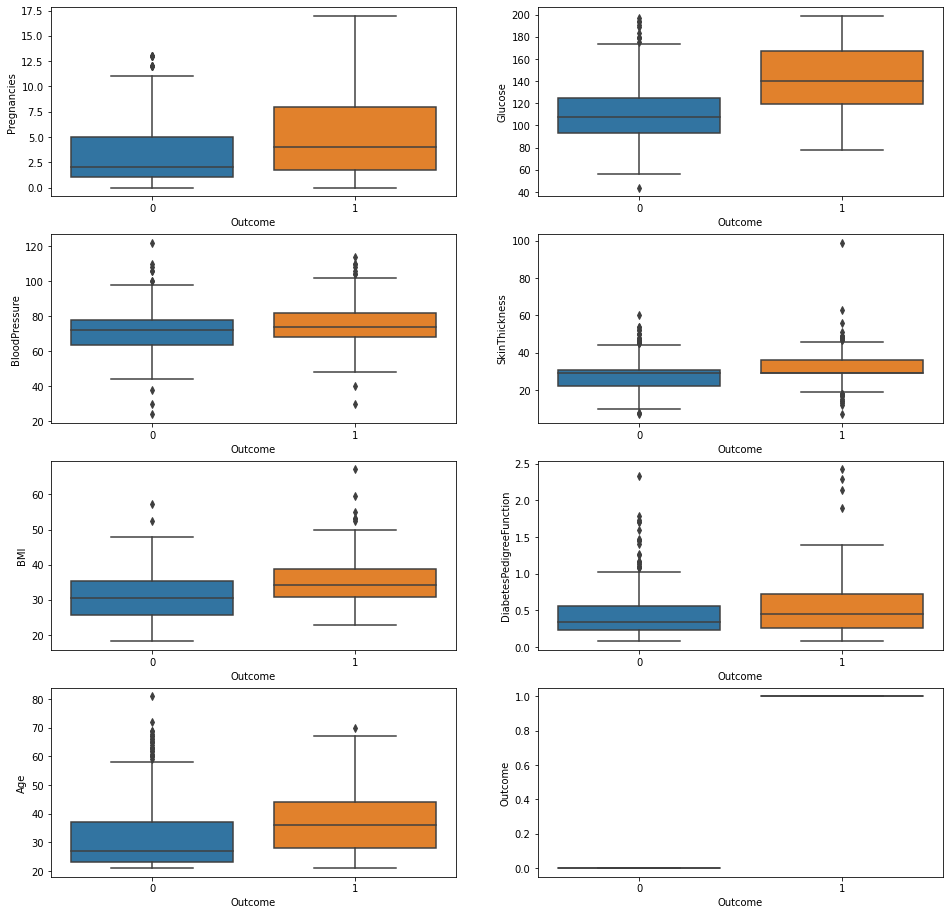

In [ ]:
# check data distribution using boxplot
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.boxplot(x= 'Outcome' , y='Pregnancies' ,data=diabetes_data,ax=ax[0,0])
sns.boxplot(x= 'Outcome' , y='Glucose' ,data=diabetes_data,ax=ax[0,1])
sns.boxplot(x= 'Outcome' , y='BloodPressure' ,data=diabetes_data,ax=ax[1,0])
sns.boxplot(x= 'Outcome' , y='SkinThickness' ,data=diabetes_data,ax=ax[1,1])
sns.boxplot(x= 'Outcome' , y='BMI' ,data=diabetes_data,ax=ax[2,0] )
sns.boxplot(x= 'Outcome' , y='DiabetesPedigreeFunction' ,data=diabetes_data,ax=ax[2,1])
sns.boxplot(x= 'Outcome' , y='Age' ,data=diabetes_data,ax=ax[3,0])
sns.boxplot(x= 'Outcome' , y='Outcome' ,data=diabetes_data,ax=ax[3,1])


From the boxplot above, can be concluded that :
*   woman who had more pregnancies are more likely to have diabetes compared  to non-diabetics.
*   Diabetics woman have higher Plasma glucose concentration compared  to non-diabetics.
*   Diastolic blood pressure for diabetic woman is higher compared  to non-diabetics.
*   Diabetics woman normally has high skin thickness 
*   BMI for diabetics woman is higher compared to non-diabetic
*   Diabetes PedigreeFunction for diabetics woman is higher compared to non-diabetic
*   Older people has more chance to have diabetes




In [ ]:
#exclude blood pressure <=40, skinthickness <= 10 and >= 70  and Glucose values <60 for non_outlier_df
non_outlier_df = diabetes_data[(diabetes_data['BloodPressure']>=40)&(diabetes_data['SkinThickness'].between(10, 70))&(diabetes_data['Glucose']>60)]

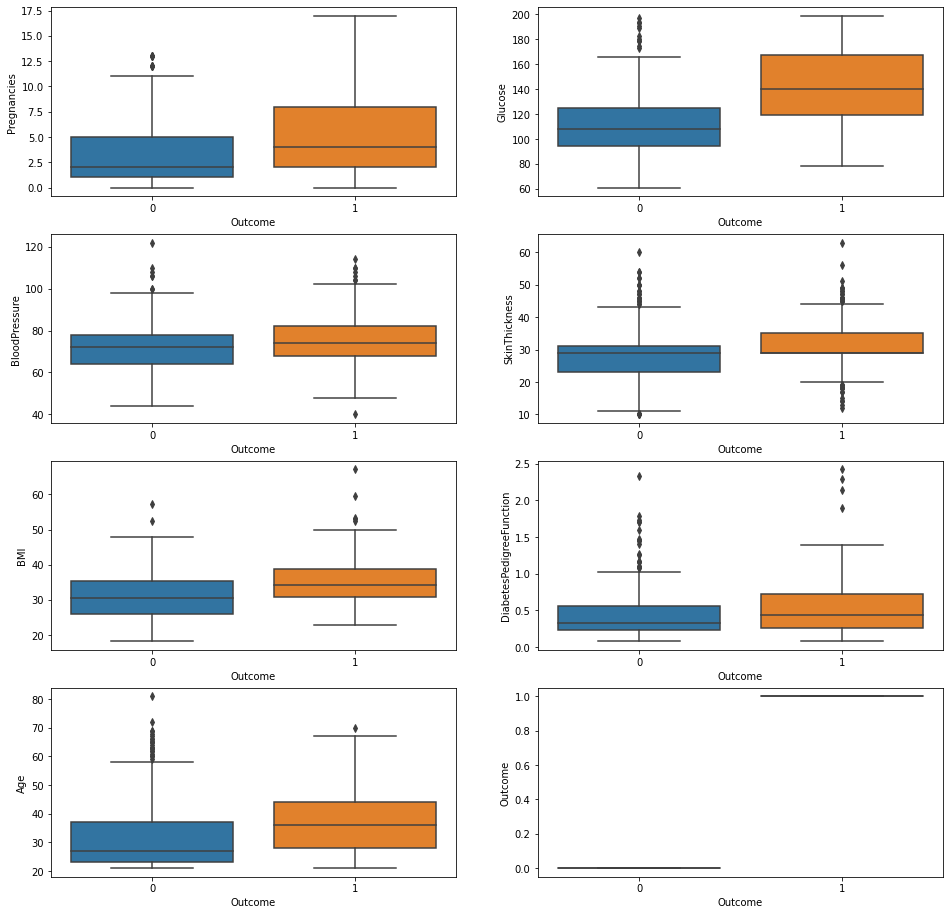

In [ ]:
# check data distribution after exclude blood pressure, skinthickness and Glucose values  
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.boxplot(x= 'Outcome' , y='Pregnancies' ,data=non_outlier_df,ax=ax[0,0])
sns.boxplot(x= 'Outcome' , y='Glucose' ,data=non_outlier_df,ax=ax[0,1])
sns.boxplot(x= 'Outcome' , y='BloodPressure' ,data=non_outlier_df,ax=ax[1,0])
sns.boxplot(x= 'Outcome' , y='SkinThickness' ,data=non_outlier_df,ax=ax[1,1])
sns.boxplot(x= 'Outcome' , y='BMI' ,data=non_outlier_df,ax=ax[2,0] )
sns.boxplot(x= 'Outcome' , y='DiabetesPedigreeFunction' ,data=non_outlier_df,ax=ax[2,1])
sns.boxplot(x= 'Outcome' , y='Age' ,data=non_outlier_df,ax=ax[3,0])
sns.boxplot(x= 'Outcome' , y='Outcome' ,data=non_outlier_df,ax=ax[3,1])


In [ ]:
# check shape of diabetes_data
print("The shape of non outlier dataset :", non_outlier_df.shape)

The shape of non outlier dataset : (755, 8)


# Feature Correlation

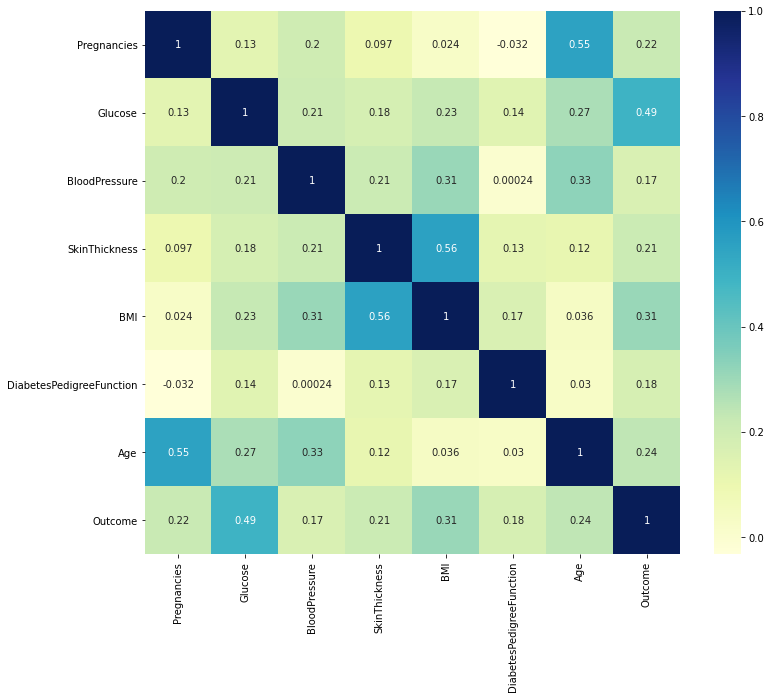

In [ ]:
# check correlation between column
plt.figure(figsize=(12,10)) 
p=sns.heatmap(non_outlier_df.corr(), annot=True,cmap ='YlGnBu')  



*   Outcome has high correlation with Glucose. 
*   Skinthickness has high correlation with BMI.
*   Pregnancies has high correlation with Age.


 


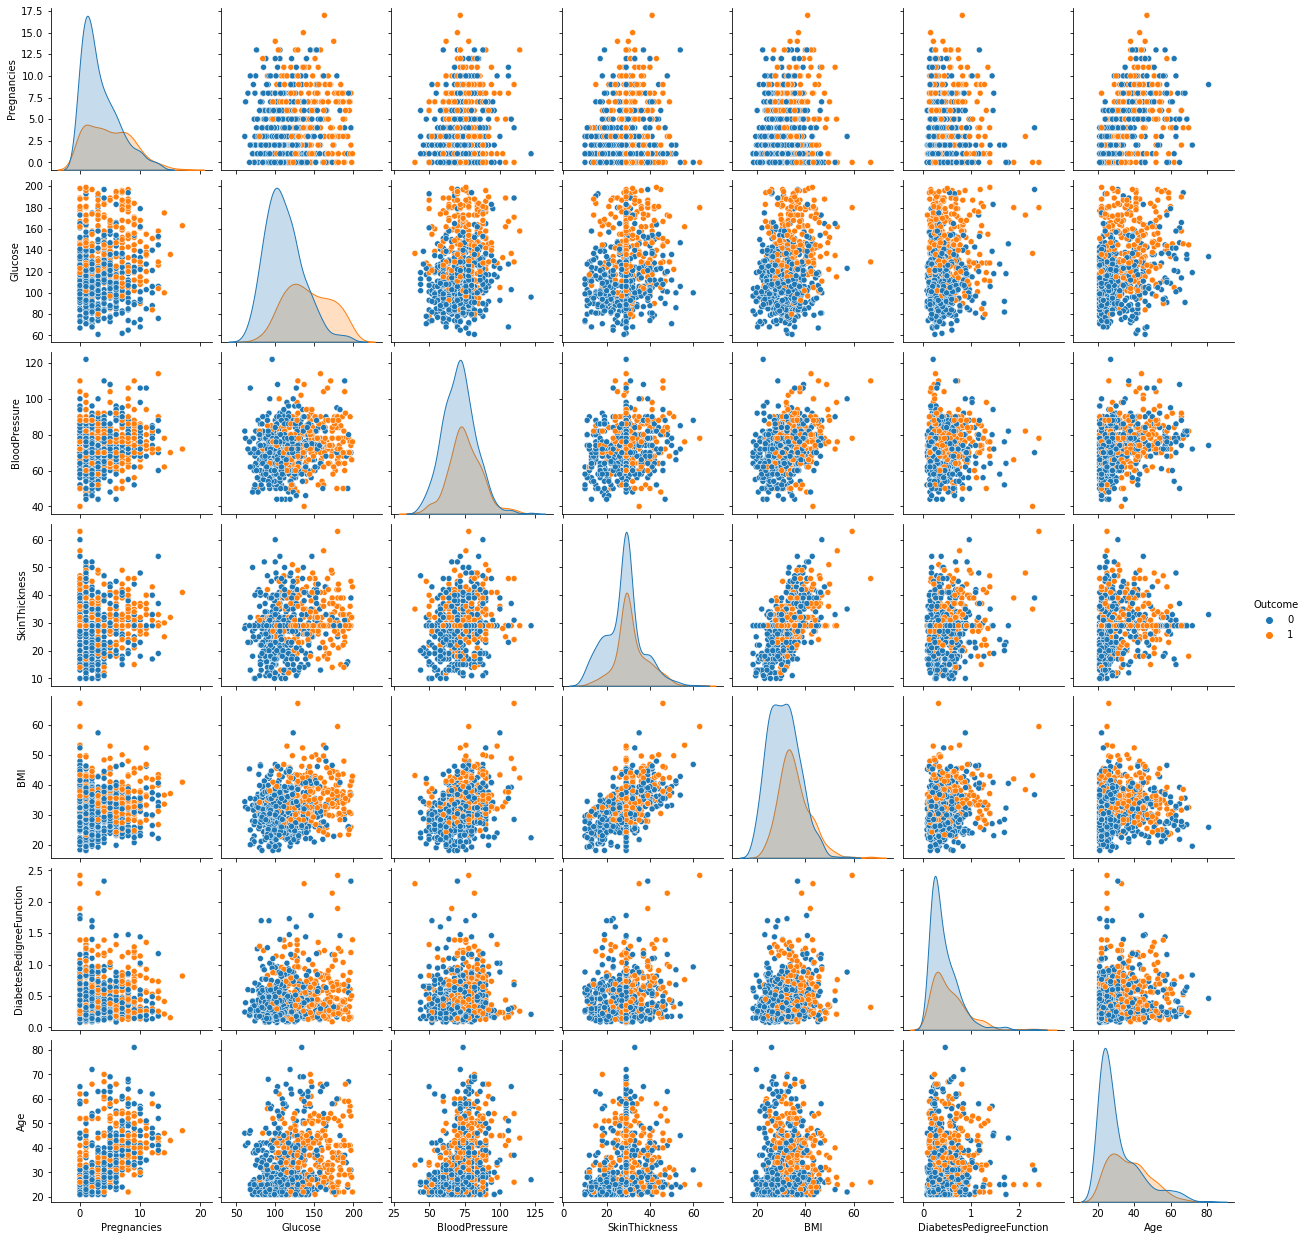

In [ ]:
#create pairplot of the dataset
sns.pairplot(non_outlier_df,hue='Outcome')

In [ ]:
#create final_df that will be used for prediction 
final_feature_column = ['Pregnancies','Glucose','BloodPressure','BMI','DiabetesPedigreeFunction']
target_column = ['Outcome']
final_column = final_feature_column+target_column
final_df = non_outlier_df[final_column].copy()

Skinthickess and Age have not been selected  for final_feature_column in order to prevent multicollinearity. 

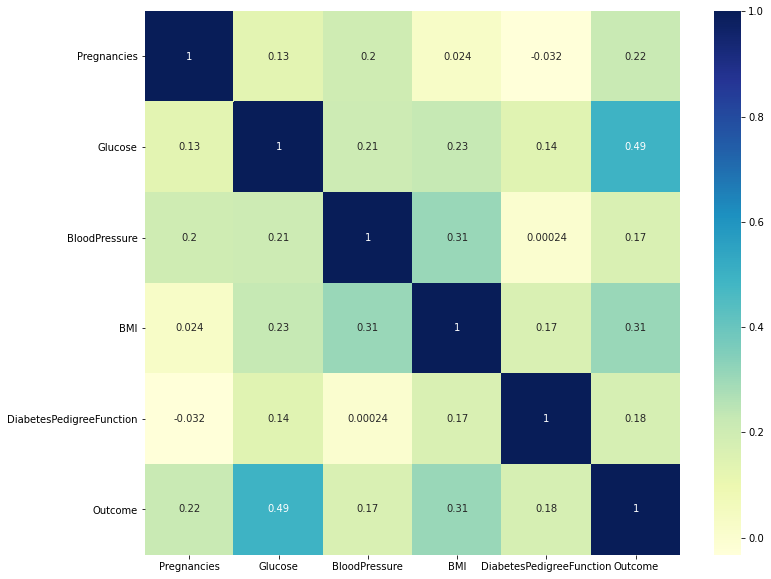

In [ ]:
# plot correlation between column after some features have been dropped
plt.figure(figsize=(12,10)) 
p=sns.heatmap(final_df.corr(), annot=True,cmap ='YlGnBu') 

In [ ]:
# check shape of the data that will be used to logistic regression
final_df.shape

(755, 6)

# Logistic Regression

In [ ]:
# prepare the data
target = 'Outcome'
X = final_df.loc[:,final_df.columns!=target]
Y = final_df.loc[:,final_df.columns==target]

In [ ]:
# split the data into test and train
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,Y,train_size=0.8,random_state=0)

In [ ]:
# load the algorithm
classification_model = linear_model.LogisticRegression(class_weight='balanced')

In [ ]:
# train the data
clf = classification_model.fit(X_train, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# predict the X using trained model
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

In [ ]:
# evaluate classification model - accuracy
accuracy_training = metrics.accuracy_score(y_train,y_train_pred)
accuracy_test = metrics.accuracy_score(y_test,y_test_pred)

print('Accuracy Training Data: {}'.format(accuracy_training))
print('Accuracy Test Data: {}'.format(accuracy_test))

Accuracy Training Data: 0.7549668874172185
Accuracy Test Data: 0.7880794701986755


In [ ]:
# report of the classification model
from sklearn.metrics import classification_report

print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        96
           1       0.71      0.71      0.71        55

    accuracy                           0.79       151
   macro avg       0.77      0.77      0.77       151
weighted avg       0.79      0.79      0.79       151

